<font size=4>
Registration number: 210616

Import Necessary Libraries

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size=5>
Metrics

Define the metrics that will be used in this data-set (ATE & PEHE)

In [33]:
def abs_ate(effect_true, effect_pred):
  ATE=np.abs(np.mean(effect_true)-np.mean(effect_pred))
  return ATE
def pehe(effect_true, effect_pred):
  PEHE=np.sqrt(np.mean((np.subtract(effect_true, effect_pred))**2))
  return PEHE

<font size=5>
Read data set

In [2]:
df = pd.read_csv("ihdp.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


Check how balanced the data is

In [9]:
df.value_counts('t')

t  
0.0    608
1.0    139
dtype: int64

Confirm the number of samples

In [14]:
df.index

RangeIndex(start=0, stop=747, step=1)

Check if there is any missing data 
(There isn't)

In [4]:
df.isnull().sum(axis = 0)

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
t      0
yf     0
ycf    0
ite    0
dtype: int64

Quick analysis with the median and mean of the outcomes

In [3]:
df.groupby('t')['yf'].agg(['median','mean'])

,median,mean
t,,
0.0,2.223557,2.411297
1.0,6.307376,6.432418


Histogram of both treated and untreated factual outcomes

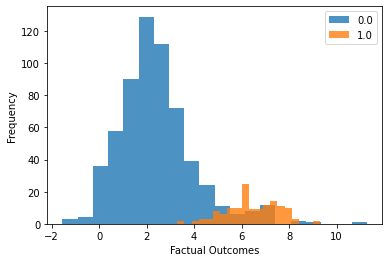

In [55]:
df.groupby('t')['yf'].plot(kind='hist', bins=20, alpha=0.8, legend=True)
plt.xlabel('Factual Outcomes')
plt.savefig('IHDP_Outcome.png', dpi=1200)

Histogram of both treated and untreated counterfactual outcomes

Text(0.5, 0, 'CounterFactual Outcomes')

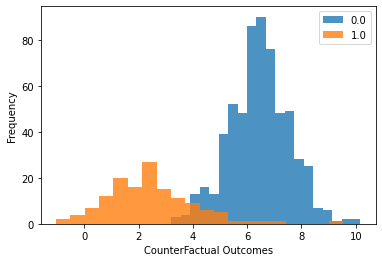

In [36]:
df.groupby('t')['ycf'].plot(kind='hist', bins=20, alpha=0.8, legend=True)
plt.xlabel('CounterFactual Outcomes')


Divide the background variables, treatment, outcome and ITE data

In [45]:
X = df[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25']]
T = df['t']
Y = df['yf']
ite = df['ite']

Quick visualisation of the data

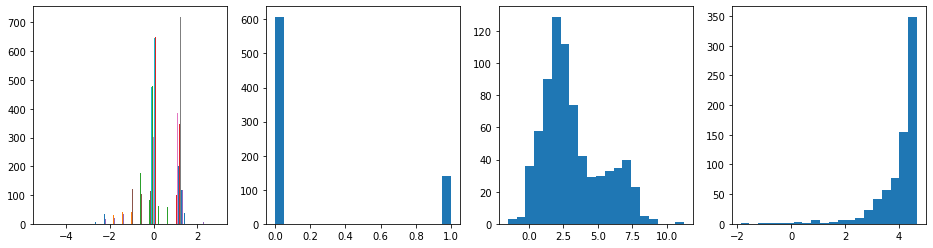

In [23]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].hist(X, bins=bins)
axs[1].hist(T, bins=bins)
axs[2].hist(Y, bins=bins)
axs[3].hist(ite, bins=bins)
plt.show()

<font size=5>
Preprocessing

Split the data and Scale it

In [60]:
x_train, x_test, t_train, t_test, y_train, y_test, ite_train, ite_test = train_test_split(X, T, Y, ite, test_size=0.2)

t_train = t_train.to_numpy()
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()

scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

Concatenate the x and t training data to prepare it for the Random Forest Regressor

In [62]:
xt_train = np.concatenate([x_train,t_train.reshape(-1,1)], axis=1)

